In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
ranking = pd.read_csv('chess-fide-ranking.csv')
ranking.head()

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


* Consertando possíveis espaços nos nomes das colunas.

In [23]:
ranking.columns = ['rank', 'name', 'ELO', 'title', 'federation', 'games', 'birth_year']

* Média geral rating

In [5]:
ranking.ELO.mean()

2662.385

* Média por federação

In [52]:
mean_by_federation = ranking.groupby('federation').ELO.mean().to_frame()
mean_by_federation.sort_values(['ELO'], ascending=False, inplace=True)
mean_by_federation = mean_by_federation.reset_index()
mean_by_federation.index += 1
mean_by_federation

,federation,ELO
1,Norway,2724.666667
2,Bulgaria,2706.500000
3,United States,2686.736842
4,China,2684.333333
5,United Arab Emirates,2684.000000
6,Viet Nam,2683.500000
7,Egypt,2680.000000
8,Azerbaijan,2679.428571
9,France,2678.857143
10,FIDE,2672.833333


In [7]:
median_federation_elo = ranking.groupby('federation').ELO.median().to_frame()
median_federation_elo.sort_values(['ELO'], ascending=False, inplace=True)
median_federation_elo = median_federation_elo.reset_index()
median_federation_elo.index += 1
median_federation_elo

,federation,ELO
1,Bulgaria,2706.5
2,United Arab Emirates,2684.0
3,Viet Nam,2683.5
4,United States,2683.0
5,Egypt,2680.0
6,FIDE,2675.0
7,China,2673.5
8,Norway,2672.0
9,Ukraine,2671.0
10,Spain,2671.0


In [8]:
print(ranking.query("federation=='Norway '").ELO.std())
print(ranking.query("federation=='Russian Federation '").ELO.std())
print(ranking.query("federation=='United States '").ELO.std())
print(ranking.query("federation=='Bulgaria '").ELO.median())

121.85784067237255
46.69751608659725
58.31508486495598
2706.5


* Quantidade de Jogadores por país

In [9]:
players_by_nation = ranking.federation.value_counts().to_frame().reset_index()
players_by_nation.columns = ['Country', 'Players']
players_by_nation.index += 1
players_by_nation

,Country,Players
1,Russian Federation,22
2,United States,19
3,India,17
4,Ukraine,13
5,FIDE,12
6,China,12
7,Germany,9
8,Armenia,9
9,France,7
10,Azerbaijan,7


In [10]:
np.size(ranking.federation.unique())

43

<AxesSubplot:xlabel='federation', ylabel='ELO'>

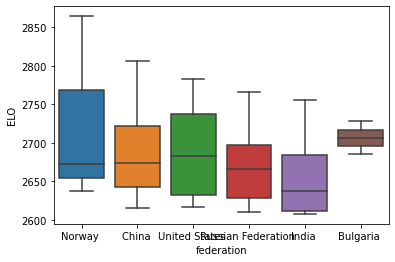

In [11]:
sns.boxplot(x='federation', y='ELO', data = ranking.query("federation in ['Russian Federation ', 'United States ', 'India ', 'Norway ', 'Bulgaria ', 'China ']"))

In [12]:
ranking.query("federation=='Bulgaria '")

,rank,name,ELO,title,federation,games,birth_year
20,21,Veselin Topalov,2728,GM,Bulgaria,2383,1975
51,52,Ivan Cheparinov,2685,GM,Bulgaria,2048,1986


In [13]:
ranking.birth_year.unique()

array([1990, 1992, 2003, 1982, 1993, 1996, 1994, 1987, 1985, 1969, 1983,
       1998, 1989, 1975, 1999, 1991, 1986, 1997, 1972, 2000, 1971, 2001,
       2004, 1995, 2006, 1976, 2002, 1988, 1977, 1979, 1968, 1974, 1980,
       1984, 2005, 1981, 1966, 1978, 1965, 1970], dtype=int64)

In [54]:
d60 = len(ranking.query("1959 < birth_year <= 1969"))
d70 = len(ranking.query("1969 < birth_year <= 1979"))
d80 = len(ranking.query("1979 < birth_year <= 1989"))
d90 = len(ranking.query("1989 < birth_year <= 1999"))
d00 = len(ranking.query("1999 < birth_year <= 2010"))



dataframe = pd.DataFrame(df)
dataframe

,Idade,Jogadores
0,53 - 62,28
1,43 - 52,76
2,33 - 42,66
3,23 - 32,24
4,16 - 22,6


<AxesSubplot:xlabel='Idade', ylabel='Jogadores'>

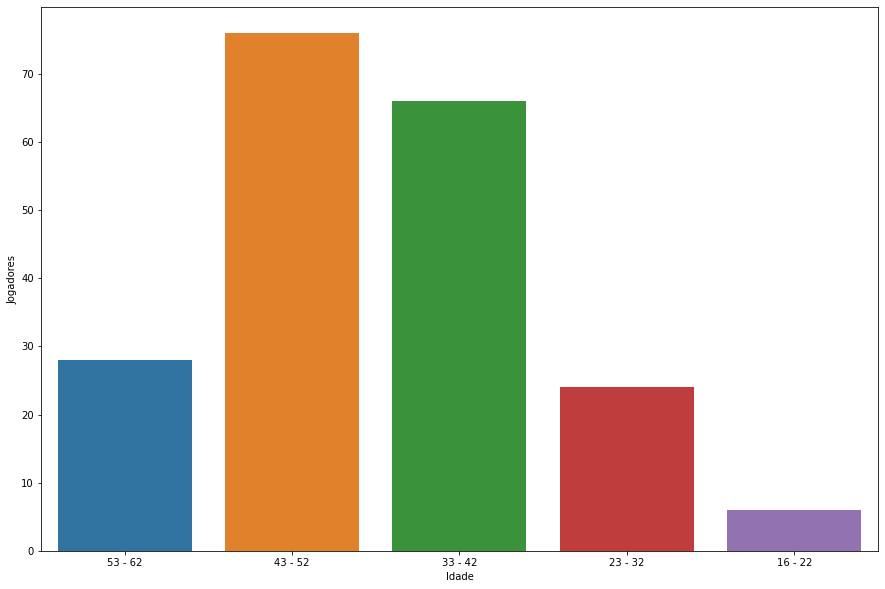

In [55]:
plt.figure(figsize=(15, 10))

sns.barplot(x='Idade', y='Jogadores', data=dataframe)

In [60]:
# mediana do rating por década

df = ranking.groupby('birth_year').ELO.median().to_frame()
df.sort_values(['ELO'], ascending=False, inplace=True)
df = df.reset_index()
df.index += 1
df

,birth_year,ELO
1,1987,2702.0
2,1982,2702.0
3,2003,2688.5
4,1975,2684.0
5,2006,2684.0
6,1969,2683.0
7,1996,2680.5
8,1997,2678.0
9,1983,2674.5
10,2000,2672.0
